In [1]:
#Modules.
from Classes import *
import AgeFunctions as fun

%matplotlib inline
%pylab inline

#Plot settings.
rc('font', size = 18)
rc('lines', linewidth = 2)

myColors = plt.cm.Spectral(concatenate([arange(0,0.35,1/12.),arange(0.6,1.05,1/12.)]))

Populating the interactive namespace from numpy and matplotlib


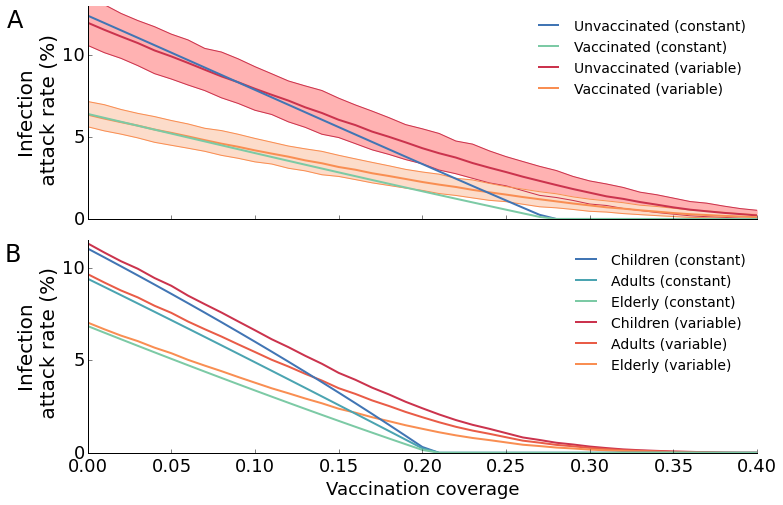

In [5]:
fig = plt.figure(figsize=(12,8))

'''
#--------------------------------------------------------------------------
ax = fig.add_subplot(311)
text(-0.12, 0.9,'A',transform = ax.transAxes, fontsize = 24)



#Parameters.
sweepVc = arange(0,0.71,0.01)

#Read data.
meanFinalDet = fun.readData('/Users/woolthuis/vaccination/model/oneyear/data/sweepVc-meanFinalDet')
meanFinal = fun.readData('/Users/woolthuis/vaccination/model/oneyear/data/sweepVc-meanFinal')

#Functions.
def giveBoundaries(y):
    boundaries = transpose([(x[24],x[499],x[975]) for x in y])
    return boundaries[0], boundaries[1], boundaries[2]



ax.plot(sweepVc,meanFinalDet, color=myColors[9])

lower, median, upper = giveBoundaries(meanFinal)
ax.plot(sweepVc, median, color=myColors[1])
ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=myColors[1])
ax.fill_between(sweepVc, lower, upper, color=[255/255.,178/255.,178/255.])


ax.set_xlim([0,0.7])

ax.set_ylim([0,0.12])
ax.set_yticks([0,0.05,0.1])
ax.set_yticklabels(['0','5','10'])

#ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, color=myColors[9],label='Constant duration of immunity')
ax.plot(-1, -1, color=myColors[1],label='Variable duration of immunity')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)
'''


#--------------------------------------------------------------------------
ax = fig.add_subplot(211)
text(-0.12, 0.9,'A',transform = ax.transAxes, fontsize = 24)



#Parameter range.
sweepVc = arange(0.000001,0.41,0.01)

#Read data from SweepVc.
runsDeterministic = fun.readData('/Users/woolthuis/vaccination/model/leaky/data/sweepVc-Deterministics')
runsStochastic = fun.readData('/Users/woolthuis/vaccination/model/leaky/data/sweepVc-Stochastics')

#Functions.
def giveBoundaries(y):
    #Sort runs, looping over Vc's.
    y = [sorted(x) for x in y]
    boundaries = transpose([(x[24],x[499],x[975]) for x in y])
    #boundaries = transpose([(x[0],x[1],x[2]) for x in y])
    return boundaries[0], boundaries[1], boundaries[2]

def plotStochastic(ax,y,color,colorBackground,credibility = True):
    lower, median, upper = giveBoundaries(y)
    ax.plot(sweepVc, median, linewidth=2,color=color, zorder = 1)
    if credibility:
        ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=color, zorder = 0)
        ax.fill_between(sweepVc, lower, upper, color=colorBackground, zorder = 0)




meanFinalDet = [runsDeterministic[Vc].meanFinalsize['s'] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[9])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize['p'] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[7])

meanFinal = [[run.meanFinalsize['s'] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[1],[255/255.,178/255.,178/255.])

meanFinal = [[run.meanFinalsize['p'] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[3],[252/255.,220/255.,202/255.])

ax.set_xlim([0,0.4])
ax.set_xticklabels([])

ax.set_ylim([0,0.13])
ax.set_yticks([0,0.05,0.1])
ax.set_yticklabels(['0','5','10'])

ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label = 'Unvaccinated (constant)')
ax.plot(-1, -1, linewidth=2,color=myColors[7],label = 'Vaccinated (constant)')
ax.plot(-1,-1, linewidth=2, color=myColors[1],label = 'Unvaccinated (variable)')
ax.plot(-1, -1, linewidth=2,color=myColors[3],label = 'Vaccinated (variable)')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)


#--------------------------------------------------------------------------
ax = fig.add_subplot(212)
text(-0.12, 0.9,'B',transform = ax.transAxes, fontsize = 24)


#Parameter range.
sweepVc = arange(0,0.41,0.01)

#Read data from SweepVc.
runsDeterministic = fun.readData('data/sweepVc-Deterministics')
runsStochastic = fun.readData('data/sweepVc-Stochastics')


meanFinalDet = [runsDeterministic[Vc].meanFinalsize[0] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[9])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize[1] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[8])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize[2] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[7])



meanFinal = [[run.meanFinalsize[0] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[1],[255/255.,178/255.,178/255.], credibility = False)

meanFinal = [[run.meanFinalsize[1] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[2],[252/255.,220/255.,202/255.], credibility = False)

meanFinal = [[run.meanFinalsize[2] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[3],[252/255.,220/255.,202/255.], credibility = False)




ax.set_xlim([0,0.4])
ax.set_ylim([0,0.115])
ax.set_yticks([0,0.05,0.1])
ax.set_yticklabels(['0','5','10'])

ax.set_xlabel('Vaccination coverage')
ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label = 'Children (constant)')
ax.plot(-1, -1, linewidth=2,color=myColors[8],label = 'Adults (constant)')
ax.plot(-1, -1, linewidth=2,color=myColors[7],label = 'Elderly (constant)')

ax.plot(-1,-1, linewidth=2, color=myColors[1],label = 'Children (variable)')
ax.plot(-1,-1, linewidth=2, color=myColors[2],label = 'Adults (variable)')
ax.plot(-1, -1, linewidth=2,color=myColors[3],label = 'Elderly (variable)')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)

#--------------------------------------------------------------------------



subplots_adjust(hspace = 0.1)

show()


#Save figure.
if True:
    fig.savefig('figures/sweepVcAll.eps')
    fig.savefig('figures/sweepVcAll.png')